In [8]:
%matplotlib inline
import matplotlib.pyplot as plt # pyplot.  
import numpy as np # numpy.  
import cv2 # the OpenCV library.  

In [9]:
def get_mouse_mask(frame):
    hsv =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # convert from RGB to HSV.  
    mouse_mask = cv2.inRange(hsv, np.array((0,0,0)), np.array((50,50,50))) 
                        # create a mask for dark, desaturated things.  
    kernel = np.ones((5,5),np.uint8) # a kernel for filtering.  
    mouse_mask = cv2.morphologyEx(mouse_mask, cv2.MORPH_CLOSE, kernel) 
                        # the close filter.  
    mouse_mask = cv2.morphologyEx(mouse_mask, cv2.MORPH_OPEN, kernel)
                        # the open filter.  
    return mouse_mask

def get_wall_mask(mouse_mask,wall_left=1,wall_right=1,
                             wall_top=50,wall_bottom=50):
    wall_mask = mouse_mask.copy() # create a new wall mask for walls 
                                  # that look like the mouse.  
    wall_mask[wall_top:-wall_bottom,wall_left:-wall_right] = 0 
                        # nothing more than subtract_* pixels from the 
                        # top and bottom can be a wall. 
    return wall_mask  
    
def show_mask(mask):
    plt.imshow(mask) # show the mask  
    plt.set_cmap('Greys_r') # display key areas as white and everything 
                            # else as black  
        
def get_centroid(mask):
    mask_y,mask_x = np.where(mask==255) # get 'on' pixels.  
    x_mid = int(mask_x.mean()) # find mean of 'on' x pixels.  
    y_mid = int(mask_y.mean()) # find mean of 'on' y pixels.  
    return x_mid,y_mid

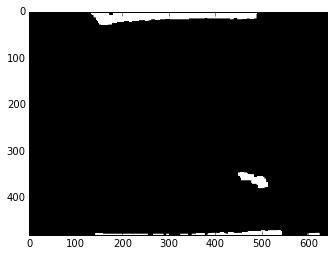

In [10]:
# create a preliminary mouse mask.  
cap = cv2.VideoCapture('/Users/rgerkin/Desktop/mouse.avi') 
                        # open the movie.  
ret,frame = cap.read() # get the first frame, which is messed up.  
ret,frame = cap.read() # get the second frame.  
mouse_mask = get_mouse_mask(frame) # get the mouse mask (with walls)
show_mask(mouse_mask) # show the mask  

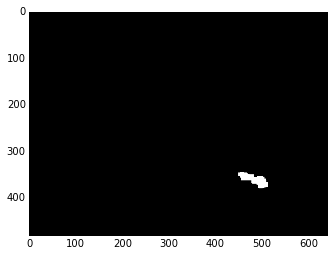

In [11]:
# won't be necessary if walls are not dark.  
wall_mask = get_wall_mask(mouse_mask)
mouse_mask_no_wall = mouse_mask - wall_mask                   
show_mask(mouse_mask_no_wall) # Show this new mask  

In [12]:
# find the initial location of the mouse.
x_mid,y_mid = get_centroid(mouse_mask_no_wall)
top,height,left,width = y_mid-40,80,x_mid-40,80 # initial window location  
track_window = (left,top,width,height)
print("Initial coordinates are x=%d,y=%d" % (x_mid,y_mid))

Initial coordinates are x=481,y=360


In [13]:
# setup the termination criteria
# either 10 iteration or move by at least 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
path = np.array([x_mid,y_mid])
cap = cv2.VideoCapture('/Users/rgerkin/Desktop/mouse.avi') 
                        # open the movie. 
while(1): # the main loop.  
    ret,frame = cap.read() # get a frame.  
    if not ret: # if there is no frame to get.  
        break # exit the loop.  
    mouse_mask = get_mouse_mask(frame)
    mouse_mask_no_wall = mouse_mask - wall_mask
    ret, track_window = cv2.CamShift(mouse_mask_no_wall, 
                                     track_window, term_crit)
        # apply camshift to get the new location
    box = cv2.boxPoints(ret) # get the bounding box
    box = np.int0(box) # convert to integers
    #path = np.vstack((path,box.mean(axis=0)))
    #if(len(path)>10):
    #    v = 0
    #    for i in range(10):
    #        v += (10*(i+1))*(path[-1-i] - path[-2-i])
    #    v = np.array([path[-1],path[-1]+v])
    #    v = np.int0(v)
    #    img2 = cv2.polylines(frame,[box,v],True, 255,2) 
    #else:
    #    # create image with box
    img2 = cv2.polylines(frame,[box],True, 255,2)
    cv2.imshow('img2',img2) # show the image
    k = cv2.waitKey(60) & 0xff # get a keystroke
    if k == 27: # if the escape key is pressed 
        break # exit the loop
        
cv2.destroyAllWindows() # close all windows  
cap.release() # close the movie

In [ ]:
[path[-1],path[-1]+v]